<a href="https://colab.research.google.com/github/slyofzero/Weather-Prediction/blob/main/Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aim -
To predict humidity based upon the temperature using Linear Regression.

It is suggested to open this file in `Google Colab`.

---

Pre-requisites - 


1. [Data](https://raw.githubusercontent.com/slyofzero/Least-Squares/main/weatherHistory.csv)\
Source - https://www.kaggle.com/budincsevity/szeged-weather \

  You can also use the Kaggle API to download the data, just make sure you have the API Key for that data stored in your Google Drive. \

2. Knowledge about Linear Regression and `Least Squares method`. \
3. Modules-

  * Pandas
  * Numpy
  * Matplotlib
  * Sklearn
  * Scipy
  * Statsmodels





---

##Downloading the Dataset/Competition using the Kaggle API

In [ ]:
# # Uncomment this code and run it only if you want to mount your Google Drive to go with the Kaggle API method.
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# # Uncomment this code and run it only if you have Mounted Google Drive to Colab and have the Kaggle API Key stored in it.

# !mkdir ~/.kaggle
# !cp [Drive location of the API key] ~/.kaggle/kaggle.json
# !kaggle datasets download -d [name of the dataset]
## Use {!kaggle competitions download -d [name of the dataset]} to download competitions

In [ ]:
# # Uncomment this code and run it only if you have Mounted Google Drive to Colab and have the Kaggle API Key stored in it.

# !unzip [location of the dataset's zip file]

If you face any errors with this method, reference to - \
https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

###Cleaning the Data

---

Let's get rid of the null values from the dataset

In [ ]:
# Importing the necessary modules.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Ignoring all the warnings.
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading the data.
df = pd.read_csv("https://raw.githubusercontent.com/slyofzero/Least-Squares/main/weatherHistory.csv") # Pass in the file path if you used the Kaggle API
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
# Checking for null values.
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
# Dropping all columns with any null values.
df = df.dropna()

In [ ]:
# Checking if all the null values were handled properly or not.
df.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

It's a possibility that we might need to move on to Multiple Linear Regression if Simple Linear Regression doesn't work out for us.

In that case, we'll be using all feature variables present to predict the humidity.

So, let's convert the `Formatted Date` column to a proper `datetime` column so we can use it for later predictions.

In [ ]:
# Getting all datetime values.
datetime_series = pd.to_datetime([datetime.split(".")[0] for datetime in df["Formatted Date"]])

df["Year"] = datetime_series.year
df["Month"] = datetime_series.month
df["day"] = datetime_series.day
df["Day Name"] = datetime_series.day_name()

df = df.drop(columns = "Formatted Date")

df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,day,Day Name
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,4,1,Saturday
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,4,1,Saturday
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1,Saturday
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,1,Saturday
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,1,Saturday


---

###Attempt 1 (Simple Linear Regression)

---

Our target variable would be the `Humidity` column while our feature varaible would be the `Temperature (C)` column.

So let's create Training and Testing datasets from those columns.

In [ ]:
# Importing train_test_split to split the data into training and testing data.
from sklearn.model_selection import train_test_split

features = df["Temperature (C)"]
target = df["Humidity"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

# Reshaping the data so we can use LinearRegression class on it.
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)

X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

We'll be using `Linear Regression` from `sklearn.linear_model` to create our prediction model.

In [ ]:
# Importing the LinearRegression class.
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
# Fitting the training data into it.
linreg.fit(X_train, y_train)

# Predicting using the model for both training and testing data.
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

Now we will import `r2_score`, `mean_squared_error` ,and `mean_absolute_error` to analyse the results of our model.

In [ ]:
# Analysing the results of our model.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("Training Data")
print("-" * 50)
print(f"R2 Score: {r2_score(y_train, y_train_pred):.3f}")
print(f"MSE Score: {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"RMSE Score: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")
print(f"MAE Score: {mean_absolute_error(y_train, y_train_pred):.3f}\n")

print("Testing Data")
print("-" * 50)
print(f"R2 Score: {r2_score(y_test, y_test_pred):.3f}")
print(f"MSE Score: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"RMSE Score: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")
print(f"MAE Score: {mean_absolute_error(y_test, y_test_pred):.3f}\n")

Training Data
--------------------------------------------------
R2 Score: 0.398
MSE Score: 0.023
RMSE Score: 0.152
MAE Score: 0.123

Testing Data
--------------------------------------------------
R2 Score: 0.403
MSE Score: 0.023
RMSE Score: 0.151
MAE Score: 0.122



Here the $R^2$ score is around $0.4$ for both the training prediction and testing prediction.

This means that our model only has an accuracy of $40 \%$ which ain't a very good accuracy.

---

###Residual Error Analysis

First, let's check the mean of all errors for both the training and test datasets.

For an accurate model, we need the mean of errors to be as close to 0 as possible.

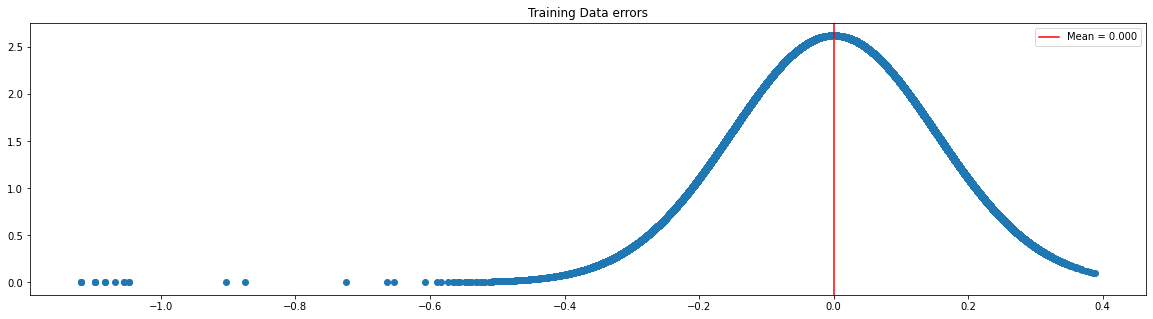

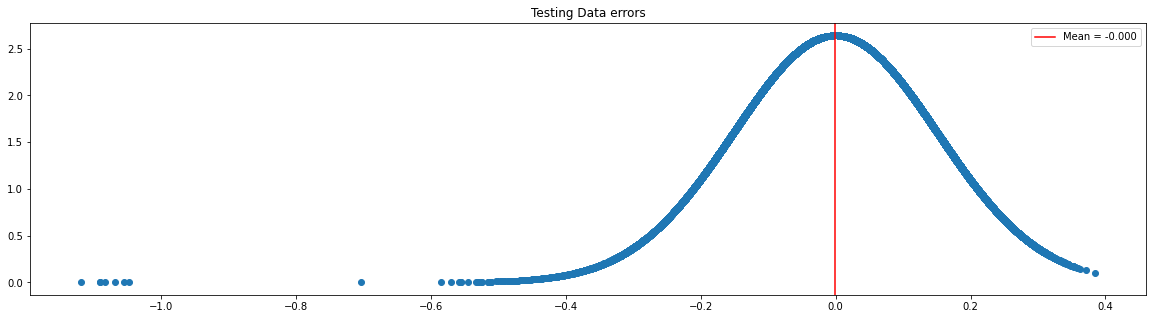

In [ ]:
# Plotting the mean of errors and checking if th errors are in a normal distribution.
from scipy.stats import norm

train_errors = y_train - y_train_pred
train_errors_pdf = norm.pdf(train_errors, train_errors.mean(), train_errors.std())

plt.figure(figsize = (20,5))
plt.scatter(train_errors, train_errors_pdf)
plt.axvline(train_errors.mean(), color = "r", label = f"Mean = {train_errors.mean():.3f}")
plt.title("Training Data errors")
plt.legend()
plt.show()

test_errors = y_test - y_test_pred
test_errors_pdf = norm.pdf(test_errors, test_errors.mean(), test_errors.std())

plt.figure(figsize = (20,5))
plt.scatter(test_errors, test_errors_pdf)
plt.axvline(test_errors.mean(), color = "r", label = f"Mean = {test_errors.mean():.3f}")
plt.title("Testing Data errors")
plt.legend()
plt.show()

Here the mean of errors for both the data sets is 0.0 which is a good thing.

The low $R^2$ score might be cause 1 feature variable is not sufficient to predict the Temperature.

So let's use Multiple Regression for this

---

###Attempt 2 (Multiple Linear Regression)

Before we move on with creating the model, we'll have to convert string data to numeric data.

So let's first identify all the numeric and non-numeric feature variables and make the model according to them.

In [ ]:
# Getting the info for each column of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   95936 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           95936 non-null  float64
 3   Apparent Temperature (C)  95936 non-null  float64
 4   Humidity                  95936 non-null  float64
 5   Wind Speed (km/h)         95936 non-null  float64
 6   Wind Bearing (degrees)    95936 non-null  float64
 7   Visibility (km)           95936 non-null  float64
 8   Loud Cover                95936 non-null  float64
 9   Pressure (millibars)      95936 non-null  float64
 10  Daily Summary             95936 non-null  object 
 11  Year                      95936 non-null  int64  
 12  Month                     95936 non-null  int64  
 13  day                       95936 non-null  int64  
 14  Day Na

In [ ]:
# Seperating the columns based upon their dtypes.
numeric_df = df.select_dtypes(exclude = object)
object_df = df.select_dtypes(include = object)

Now we have both numeric and non-numeric data stored seperately.

- For the numeric data, normalise it using \
$$y_{norm} = \frac {y_{value} - y_{mean}} {y_{std}}$$

- For non-numeric data, encode it using `get_dummies()` function in the `pandas` library. For more efficiency drop the first column by passing `drop_first = True`




In [ ]:
# Normalising the numeric data.
def normalise(series):
  if series.std() != 0:
    norm_series = (series - series.mean()) / series.std()
  else:
    norm_series = np.zeros(len(series))

  return norm_series

normalised_numeric_df = numeric_df.apply(normalise)

In [ ]:
# Encoding the non-numeric data.
object_df = pd.get_dummies(object_df, dtype = int, drop_first = True)

In [ ]:
# Concating the normalised numeric data with the encoded non-numeric data to get the original list of columns back.
df = pd.concat([numeric_df, object_df], axis = 1)
normalised_df = pd.concat([normalised_numeric_df, object_df], axis = 1)

In [ ]:
# Splitting the data into training and testing data.
features = normalised_df[normalised_df.columns.drop("Humidity")]
target = normalised_df["Humidity"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

For Multiple Regression, we'll use `statsmodels.api`.

This would allow us to get a better look at our model's accuracy and would also allow us to use the `Ordinary Least Squares` method on our data.

In [ ]:
# Using the Least Squares method for the new training data.
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     356.4
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:38:28   Log-Likelihood:                -66585.
No. Observations:               67155   AIC:                         1.337e+05
Df Residuals:                   66900   BIC:                         1.360e+05
Df Model:                         254                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
--

Even after using Multiple Regression the $R^2$ value only increased upto 0.57.

So let's try using only the highly correlated features instead of all the features.

---

###Ateempt 3 (Multiple Linear Regression with only the highly Correlated Features)

Let's find out all the highly correlated feature variables and make a model using them.

In [ ]:
# Storing all the highly correlated columns into a list
humidity_feature_corr = df.corr()["Humidity"]
highly_corr_features = []

for index in humidity_feature_corr.index:
  corr_coef = humidity_feature_corr[index]

  if corr_coef >= 0.5 or corr_coef <= -0.5:
    highly_corr_features.append(index)

highly_corr_features.pop("Humidity")
highly_corr_features

{'Apparent Temperature (C)': -0.6023899226411885,
 'Temperature (C)': -0.6321477013082594}

In [ ]:
# Creating a model using only the highly correlated feature variables.
highly_corr_X_train_sm = sm.add_constant(X_train.loc[:, highly_corr_features])
lr = sm.OLS(y_train, highly_corr_X_train_sm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                 2.652e+04
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:46:25   Log-Likelihood:                -75777.
No. Observations:               67155   AIC:                         1.516e+05
Df Residuals:                   67152   BIC:                         1.516e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Here the data only had 2 features highly correlated with the target variable.

Plus in the model summary, the p-value for the constant is greater than 0.05.

For the above two reasons we'll be using `Polynomial Regression` in the next notebook to create a prediction model instead of `Linear Regression`.

---

#END OF NOTEBOOK